In [13]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
image_path='segment2.png'

In [160]:
imgori=Image.open(image_path)

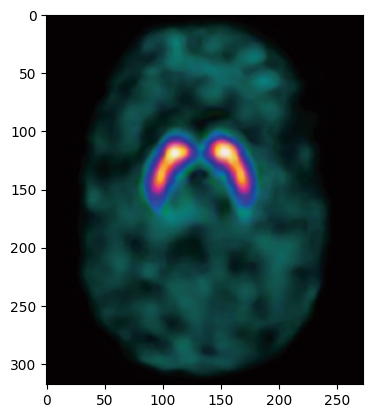

In [161]:
plt.imshow(imgori,cmap='gray')
plt.show()

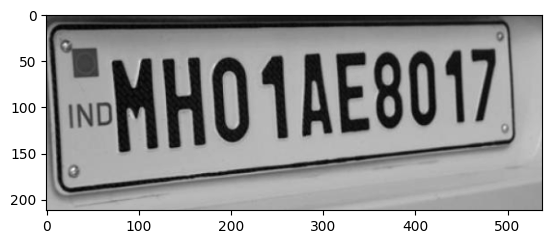

In [140]:
img = imgori.convert('L')  # Convert to grayscale
plt.imshow(img,cmap='gray')
plt.show()

In [141]:
#convert to pixels
pixels = np.array(img)
pixels

array([[ 72,  70,  67, ...,  85,  84,  84],
       [ 73,  72,  69, ...,  89,  87,  87],
       [ 73,  74,  73, ...,  92,  91,  89],
       ...,
       [160, 160, 160, ..., 139, 139, 139],
       [160, 160, 160, ..., 139, 139, 139],
       [160, 160, 160, ..., 139, 139, 139]], dtype=uint8)

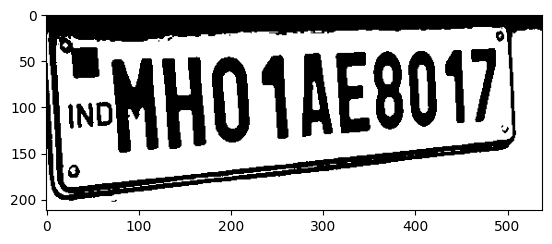

In [150]:
# Apply segmentation based on a simple intensity threshold
threshold=128
segmented_pixels = np.where(pixels > threshold, 255, 0).astype(np.uint8)
plt.imshow(segmented_pixels,cmap='gray')
plt.show()

In [153]:
# Find contours of the segmented regions
contours, _ = cv2.findContours(segmented_pixels, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[ 42, 192]],
 
        [[ 45, 192]]], dtype=int32),
 array([[[ 52, 191]],
 
        [[ 54, 191]]], dtype=int32),
 array([[[ 59, 190]],
 
        [[ 66, 190]]], dtype=int32),
 array([[[ 70, 189]],
 
        [[ 71, 189]]], dtype=int32),
 array([[[ 80, 188]],
 
        [[ 83, 188]]], dtype=int32),
 array([[[ 87, 187]],
 
        [[ 93, 187]]], dtype=int32),
 array([[[ 96, 186]],
 
        [[101, 186]]], dtype=int32),
 array([[[104, 185]],
 
        [[110, 185]]], dtype=int32),
 array([[[119, 183]],
 
        [[118, 184]],
 
        [[112, 184]],
 
        [[118, 184]],
 
        [[119, 183]],
 
        [[126, 183]]], dtype=int32),
 array([[[270, 167]],
 
        [[271, 167]]], dtype=int32),
 array([[[260, 167]],
 
        [[259, 168]],
 
        [[251, 168]],
 
        [[250, 169]],
 
        [[244, 169]],
 
        [[243, 170]],
 
        [[233, 170]],
 
        [[232, 171]],
 
        [[225, 171]],
 
        [[224, 172]],
 
        [[215, 172]],
 
        [[214, 173]],
 
      

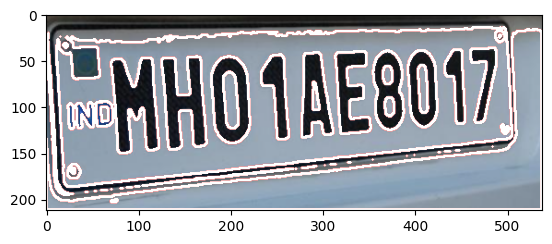

In [155]:
imgori_seg=np.array(imgori)
cv2.drawContours(imgori_seg, contours, -1, (255,0 , 0), 2) 
plt.imshow(imgori_seg)
plt.show()

In [28]:
#psnr
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel_value = 255.0
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [29]:
psnr(filtered_pixels,pixels)

34.468205282496

In [30]:
#mse
def mse(original, processed):
    return np.mean((original - processed) ** 2)

In [31]:
mse(filtered_pixels,pixels)

23.241268747127876

In [156]:
#iou
def calculate_iou(original_path, segmented_path, threshold=128):
    # Load the original image
    original_image = Image.open(original_path).convert('L')  # Convert to grayscale
    original_pixels = np.array(original_image)

    # Load the segmented image
    segmented_image = Image.open(segmented_path).convert('L')  # Convert to grayscale
    segmented_pixels = np.array(segmented_image)

    # Apply segmentation based on a simple intensity threshold
    predicted_segmentation = np.where(original_pixels > threshold, 255, 0)

    # Calculate Intersection over Union (IoU)
    intersection = np.logical_and(segmented_pixels, predicted_segmentation)
    union = np.logical_or(segmented_pixels, predicted_segmentation)
    iou = np.sum(intersection) / np.sum(union)

    print(f"IoU: {iou:.4f}")

In [158]:
calculate_iou('segment2.png','segment2_res.png',110)

IoU: 0.8186


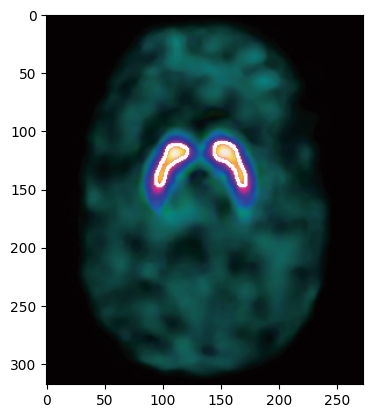

In [157]:
import numpy as np
from PIL import Image, ImageDraw
import cv2

def simple_segmentation_with_contours(image_path, threshold=128):
    # Load the image
    imgori = Image.open(image_path)
    
    img=imgori.convert('L')  # Convert to grayscale
    pixels = np.array(img)

    # Apply segmentation based on a simple intensity threshold
    segmented_pixels = np.where(pixels > threshold, 255, 0).astype(np.uint8)

    # Find contours of the segmented regions
    contours, _ = cv2.findContours(segmented_pixels, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an output image with segmented regions and contours
    output_image = Image.fromarray(segmented_pixels)
    draw = ImageDraw.Draw(output_image)
    drawContours = True  # Set to False if you only want the segmented regions without contours
    
    if drawContours:
        imgori_seg=np.array(imgori)
        output_img=cv2.drawContours(imgori_seg, contours, -1, (255, 0, 0), 2) 
        plt.imshow(output_img)
        plt.show()

    return output_image

# Example usage:
result_image = simple_segmentation_with_contours('segment2.png', threshold=128)
result_image.save('segment2_res.png')